In [63]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from itertools import groupby
import random
from efficient_apriori import apriori
import ast
import pyfpgrowth
#from apyori import apriori
import csv 

In [64]:
train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv("orders.csv")

In [65]:
sampledprior = pd.read_csv('sampledprior.csv')
cluster_segregation = pd.read_csv('cluster_segregation.csv')

In [152]:
import time
timer = []
final_avg = []
final_result = []
no_of_trans = []
for cluster_no in range(1):
    sample1 = pd.read_csv("cluster/C"+str(cluster_no)+".csv")
    userlist = sample1.user_id.tolist()
    
    df1 = orders[orders['user_id'].isin(userlist)]
    df2 = df1.loc[df1['eval_set'] == "prior"]
    
    
    ap = pd.merge(sampledprior,df2, on = ['order_id','order_id'])
    
    ordprod = ap[['order_id','product_id']]
    
    var_df = ordprod.groupby(['order_id'])['product_id'].agg(list).reset_index()
    big1 = var_df.product_id.values.tolist()
    big = [[str(x) for x in m] for m in big1] 
    
    
    fp = open("nf","r")
    contents = ast.literal_eval(fp.read())
    startTime = time.time()
    patterns = pyfpgrowth.find_frequent_patterns(contents, 5)
    fz = [k for k,v in patterns.items() if v==5]
    rules = pyfpgrowth.generate_association_rules(patterns, 0.001)
    endTime = time.time()
    
    no_of_trans.append(len(big))
    timer.append(endTime - startTime)
    
    
    '''
    f = open("dictionary/dict"+str(cluster_no)+".csv", "w")
    for key, value in rules.items():
        f.write("%s;%s\n"%(key, value))
    '''
    key = products.product_id.values.tolist()
    values = products.aisle_id.values.tolist()
    defdict = dict(zip(key, values))
    
    
    df0 = pd.merge(train, products, on = ['product_id', 'product_id'])
    final = pd.merge(df0, orders, on = ['order_id', 'order_id'])
    final = final[final['user_id'].isin(userlist)] 
    
    final1 = final.groupby(['order_id'])['product_id'].agg(list).reset_index()

    l = final1.product_id.values.tolist()
        
    res = recommend(l, rules, defdict, fz)
    final_avg.append(round(sum(res)/len(res), 2))
    final_result.append(res)
    
    

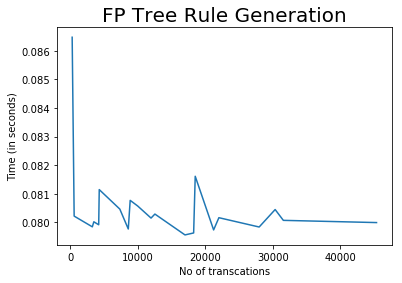

In [164]:
from collections import OrderedDict
l = dict(zip(no_of_trans, timer))
sorted_list=sorted(l.items(), key=lambda x: x[0])
myOrdDic = OrderedDict(sorted_list)
x_axis = []
y_axis = []
for k, v in myOrdDic.items():
    x_axis.append(k)
    y_axis.append(v)
plt.plot(x_axis, y_axis)
plt.xlabel('No of transcations')
plt.ylabel('Time (in seconds)')
plt.title('FP Tree Rule Generation', fontsize='20')
plt.show()

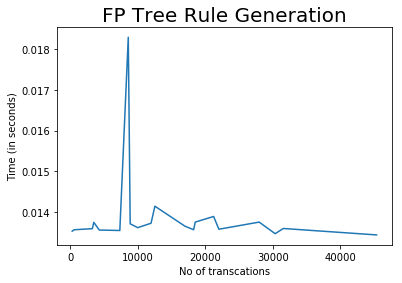

In [142]:
from collections import OrderedDict
l = dict(zip(no_of_trans1, timer1))
sorted_list=sorted(l.items(), key=lambda x: x[0])
myOrdDic = OrderedDict(sorted_list)
x_axis1 = []
y_axis1 = []
for k, v in myOrdDic.items():
    x_axis1.append(k)
    y_axis1.append(v)
plt.plot(x_axis1, y_axis1)
plt.xlabel('No of transcations')
plt.ylabel('Time (in seconds)')
plt.title('FP Tree Rule Generation', fontsize='20')
plt.show()

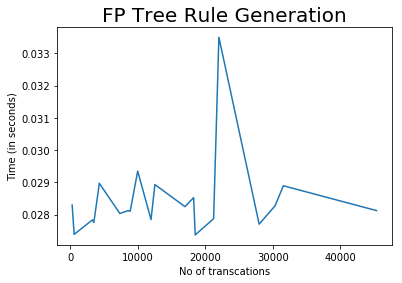

In [150]:
from collections import OrderedDict
l = dict(zip(no_of_trans2, timer2))
sorted_list=sorted(l.items(), key=lambda x: x[0])
myOrdDic = OrderedDict(sorted_list)
x_axis2 = []
y_axis2 = []
for k, v in myOrdDic.items():
    x_axis2.append(k)
    y_axis2.append(v)
plt.plot(x_axis2, y_axis2)
plt.xlabel('No of transcations')
plt.ylabel('Time (in seconds)')
plt.title('FP Tree Rule Generation', fontsize='20')
plt.show()

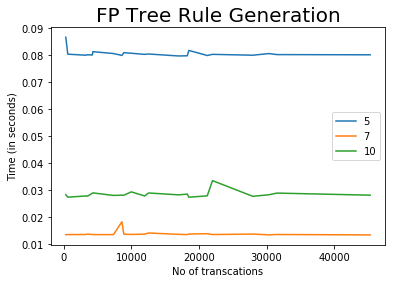

In [162]:
plt.plot(x_axis, y_axis, x_axis1, y_axis1, x_axis2, y_axis2)
plt.xlabel('No of transcations')
plt.ylabel('Time (in seconds)')
plt.title('FP Tree Rule Generation', fontsize='20')
plt.legend([5,7,10])
plt.show()